In [1]:
import numpy as np
import pylab as plt
import seaborn as sns
from scipy.signal import welch

In [2]:
time=np.linspace(0, 3600, 20*3600)
fs_hz = 20.0
sigma_K= 0.3 / np.sqrt(20.0)
print(sigma_K)

0.06708203932499368


In [26]:
# April Season
tod_1 = np.load("2022041719/43000000.0/043/V0.npz")['arr_0']/1000
wn1 = sigma_K * np.random.normal(0, sigma_K, tod_1.size)
tod_1 = tod_1 + wn1

tod_2 = np.load("2022041719/43000000.0/043/G0.npz")['arr_0']/1000
wn2 = sigma_K * np.random.standard_normal(tod_2.size)
tod_2 = tod_2 + wn1

tod_3 = np.load("2022041719/43000000.0/043/O0.npz")['arr_0']/1000
wn3 = sigma_K * np.random.standard_normal(tod_3.size)
tod_3 = tod_3 + wn3

tod_4 = np.load("2022041719/43000000.0/043/B0.npz")['arr_0']/1000
wn4 = sigma_K * np.random.standard_normal(tod_4.size)
tod_4 = tod_4 + wn4

# Winter season

todw_1 = np.load('2022010721/43000000.0/043/V0.npz')['arr_0']/1000
todw_1 = todw_1 + wn1 

todw_2 = np.load('2022010721/43000000.0/043/G0.npz')['arr_0']/1000
todw_2 = todw_2 + wn2

todw_3 = np.load('2022010721/43000000.0/043/O0.npz')['arr_0']/1000
todw_3 = todw_3 + wn3

todw_4 = np.load('2022010721/43000000.0/043/B0.npz')['arr_0']/1000
todw_4 = todw_4 + wn4




In [27]:
def noise_model(f, sigma, f_knee, alpha):
    return sigma * (1+f_knee/f)**alpha

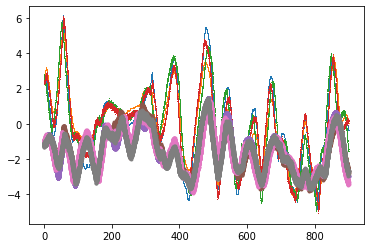

In [28]:
plt.plot(time[0:15*60*20], tod_1[0:15*60*20], ',', label="Tod 1")
plt.plot(time[0:15*60*20], tod_2[0:15*60*20], ',', label="Tod 2")
plt.plot(time[0:15*60*20], tod_3[0:15*60*20], ',', label="Tod 3")
plt.plot(time[0:15*60*20], tod_4[0:15*60*20], ',', label="Tod 4")

plt.plot(time[0:15*60*20], todw_1[0:15*60*20], '.', label="Tod 1")
plt.plot(time[0:15*60*20], todw_2[0:15*60*20], '.', label="Tod 2")
plt.plot(time[0:15*60*20], todw_3[0:15*60*20], '.', label="Tod 3")
plt.plot(time[0:15*60*20], todw_4[0:15*60*20], '.', label="Tod 4")


In [40]:
freq = np.fft.rfftfreq(tod_1.size, d=1.0/20.0)

f, ps=welch(tod_1, fs=20.0, window='hamming', average='mean', nperseg=2000)

ps1 = np.fft.rfft(tod_1) / noise_model(freq, sigma_K, 0.5, 15/3)
tod_fil = np.fft.irfft(ps1)

ps2 = np.abs(np.fft.rfft(tod_2))**2
ps3 = np.abs(np.fft.rfft(tod_3))**2
ps4 = np.abs(np.fft.rfft(tod_4))**2





ps1w = np.fft.rfft(todw_1) / noise_model(freq, sigma_K, 0.5, 11/3)
ps2w = np.fft.rfft(todw_2)
ps3w = np.fft.rfft(todw_3)
ps4w = np.fft.rfft(todw_4)




<ipython-input-27-241fb4533893>:2: RuntimeWarning: divide by zero encountered in true_divide
  return sigma * (1+f_knee/f)**alpha


/home/algebrato/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/algebrato/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/algebrato/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/algebrato/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1e-05, 10000000000.0)

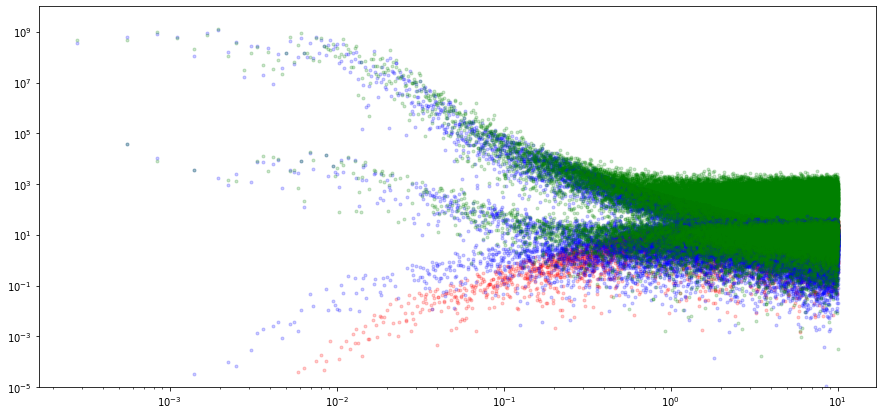

In [41]:
plt.figure(figsize=(15, 7)), 

plt.loglog(freq, ps1, "r.", alpha=0.2)
plt.loglog(freq, ps2, "b.", alpha=0.2)
plt.loglog(freq, ps3, "g.", alpha=0.2)
# plt.loglog(freq, ps4, "k.", alpha=0.2)


plt.loglog(freq, ps1w, "b.", alpha=0.2)
plt.loglog(freq, ps2w, "b.", alpha=0.2)
plt.loglog(freq, ps3w, "g.", alpha=0.2)
# plt.loglog(freq, ps4w, "k.", alpha=0.2)




plt.ylim(0.00001, 1e10)


(-1.0, 1.0)

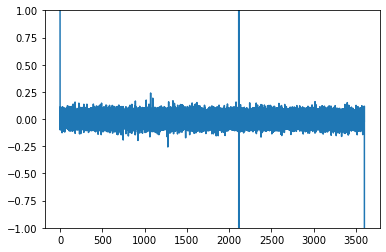

In [42]:
plt.plot(time, np.real(tod_fil))

plt.ylim(-1, 1)